### 1. Importing Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist

### 2. Loading the MNIST Dataset

In [41]:
(x_train, y_train), _ = mnist.load_data()

### 3. Selecting One Random Image per Digit

In [61]:
np.random.seed(0)
selected_images = []
labels = np.arange(10)

for label in labels:
    indices = np.where(y_train == label)[0]
    random_index = np.random.choice(indices)
    selected_images.append(x_train[random_index])

### 3. Saving Images to a .txt File

In [63]:
save_dir = "Data/Input_MNIST_Images"
if(not os.path.exists(save_dir)):
    os.makedirs(save_dir)

for idx, image in enumerate(selected_images):
    filename = os.path.join(save_dir, f"digit_{idx}.txt")
    with open(filename, 'w') as f:
        # f.write(f'Digit: {idx}\n')
        np.savetxt(f, image, fmt='%d')
        f.write('\n')

print(f"Saved selected images to '{save_dir}' directory.")

Saved selected images to 'Data/Input_MNIST_Images' directory.


### 4. Defining the Convolution Function from Scratch

In [64]:
def convolve(image, kernel, stride=1):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    
    output = np.zeros((output_height, output_width))
    
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            output[i, j] = np.sum(region * kernel)
    return output

### 5. Generating Three Random 3×3 Kernels

In [77]:
np.random.seed(0)

# kernels = [np.random.randn(3, 3) for _ in range(3)]
# kernels = [np.random.randint(0, 255, [3, 3]) for _ in range(3)]

kernels = np.array([[[0, 1, 0], 
                     [1, 0, 0], 
                     [0, 0, 0]],

                    [[1, 0, 1], 
                     [0, 1, 1], 
                     [1, 1, 1]],

                    [[0, 1, 0], 
                     [1, 0, 1], 
                     [0, 0, 0]]])

kernels

array([[[0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]],

       [[1, 0, 1],
        [0, 1, 1],
        [1, 1, 1]],

       [[0, 1, 0],
        [1, 0, 1],
        [0, 0, 0]]])

### 6. Convolving Each Image with Each Kernel

In [78]:
convolved_images = []
for image in selected_images:
    result = image
    for kernel in kernels:
        result = convolve(result, kernel)
    convolved_images.append(result)
    
print(f"Final shape of image after all convolutions: {result.shape}")
num_digits = len(selected_images)

Final shape of image after all convolutions: (22, 22)


### 7. Saving Result Images to a .txt File

In [79]:
save_dir = "Data/MNIST_Convolved_Images"
if(not os.path.exists(save_dir)):
    os.makedirs(save_dir)

for idx, convolved_image in enumerate(convolved_images):
    filename = os.path.join(save_dir, f"convolved_digit_{idx}.txt")
    with open(filename, 'w') as f:
        f.write(f'Convolved Image for Digit: {idx}\n')
        np.savetxt(f, convolved_image, fmt='%d')
        f.write('\n')

print(f"Saved convolved images to '{save_dir}' directory.")

Saved convolved images to 'Data/MNIST_Convolved_Images' directory.


### 8. Plotting All Results

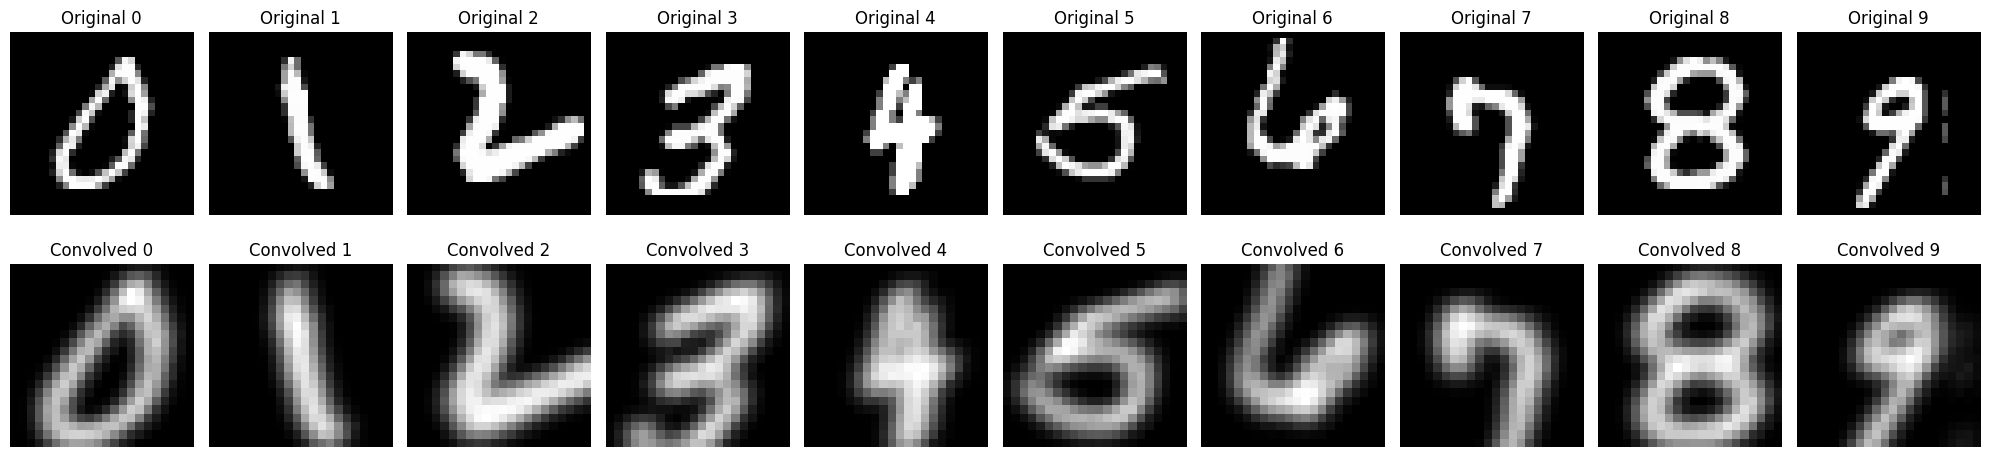

In [81]:
fig, axes = plt.subplots(2, 10, figsize=(20, 5))

for i in range(num_digits):
    axes[0, i].imshow(selected_images[i], cmap="gray")
    axes[0, i].set_title(f"Original {i}")
    axes[0, i].axis("off")

for i in range(num_digits):
    axes[1, i].imshow(convolved_images[i], cmap="gray")
    axes[1, i].set_title(f"Convolved {i}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()